
Tree Based Models - Q09- 11/July
===================================
An optometrist prescribes type of contact lenses according to 4 features (age, prescription, astigmatism and tear production rate). The data is available in 02_lens_prescription.csv file here: https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

Calculate the Gini impurity index for each of the features. 

Note that age is an ordinal variable.

Which feature indicates that contact lens should not be used?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read and display the data file
lens_data = pd.read_csv('/Users/riteshturlapaty/ai-ml-learning/AccelerateAI/7.DecisionTree/DailyQuiz/02_lens_prescription.csv')
lens_data.head(5)

,S No,Age,Prescription,Astigmatism,Tear production rate,Contact_lens
0,1,1,myope,no,reduced,no lens
1,2,1,myope,no,normal,soft
2,3,1,myope,yes,reduced,no lens
3,4,1,myope,yes,normal,hard
4,5,1,hypermetrope,no,reduced,no lens


In [3]:
lens_data.shape

(24, 6)

In [4]:
lens_data.Contact_lens.value_counts()

no lens    15
soft        5
hard        4
Name: Contact_lens, dtype: int64

In [5]:
# Assign the target column to a new dataframe
df=lens_data['Contact_lens']
target= pd.DataFrame(df, columns=['Contact_lens'])

In [6]:
#Drop Contact_lens (target) column from lens_data dataframe
lens_data.drop(columns=['Contact_lens','S No'],axis=1, inplace=True)

In [7]:
# Create dummy values to feed the values into tree model
dummy_lens_data=pd.get_dummies(lens_data)

In [8]:
dummy_lens_data.head(2)

,Age,Prescription_hypermetrope,Prescription_myope,Astigmatism_no,Astigmatism_yes,Tear production rate_normal,Tear production rate_reduced
0,1,0,1,1,0,0,1
1,1,0,1,1,0,1,0


In [9]:
X = dummy_lens_data
y = target['Contact_lens']

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X,y)

[Ellipsis]

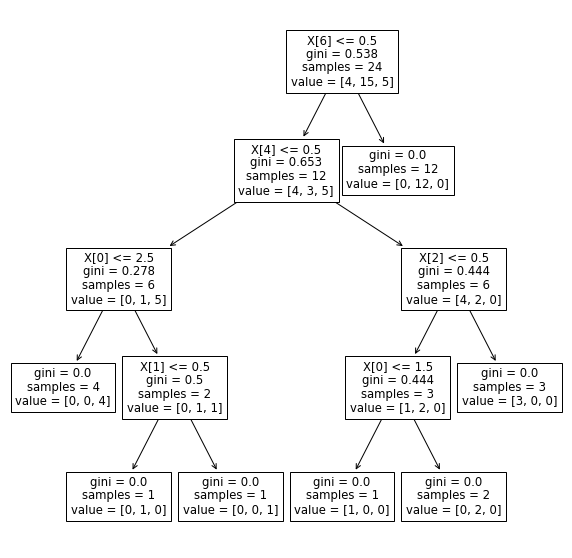

In [10]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
[...]

x[6] = Tear production rate_reduced

As evident, when Tear production rate_reduced is > 0.5, impurity index is 0.